# Exercise 1: Linear Regression 线性回归

In [2]:
%matplotlib inline
#魔法命令。将 Matplotlib 绘制的图形直接嵌入到笔记本中，而不是在新窗口中显示
import numpy as np
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm

## 1.1 Linear regression with one variable 单变量线性回归

#### 加载数据

In [3]:
datafile = 'ex1data1.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1), unpack=True) 
# unpack=True: 将各列数据解包为单独的数组。原数据为97行2列，cols把每列数据变为一个数组
print("Data shape:", cols.shape)

# 构建特征矩阵X
X = np.transpose(np.array(cols[:-1])) # transpose转置
print("X shape:", X.shape)
print(X[:5], "\n......")

# 构建目标向量y
y = np.transpose(np.array(cols[-1:]))
print("y shape:", y.shape)
print(y[:5], "\n......")

# 在X矩阵的第0列插入1，作为偏置项(b)
X = np.insert(X, 0, 1, axis=1) # （原始数组，插入位置，插入值，插入方向（沿列方向））
print(X[:5], "\n......")

Data shape: (2, 97)
X shape: (97, 1)
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]] 
......
y shape: (97, 1)
[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]] 
......
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]] 
......


#### Plotting the Data 展示数据

Text(0, 0.5, 'Profit in $10,000s')

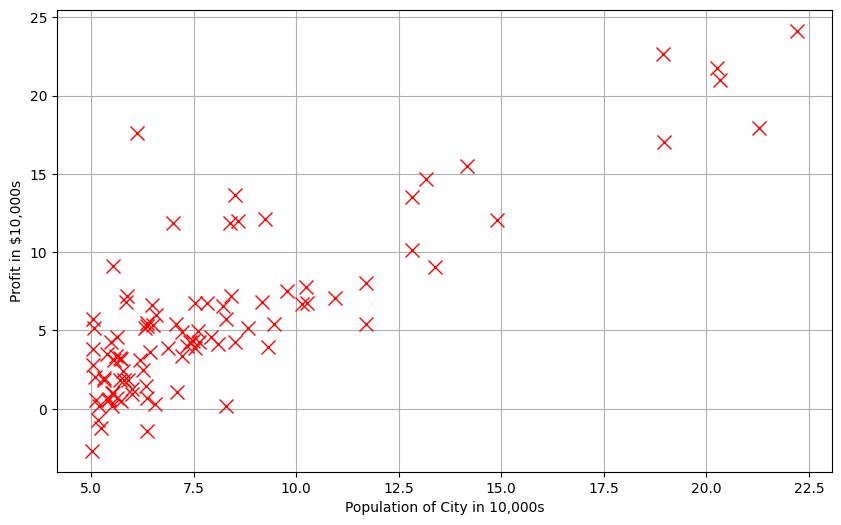

In [4]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) # 网格
plt.xlabel('Population of City in 10,000s') # 横轴，城市人口（万人）
plt.ylabel('Profit in $10,000s') # 纵轴，利润（万美元）

#### Gradient Descent 梯度下降

In [5]:
iterations = 1500
alpha = 0.01

**线性回归函数h：** 
$$h_\theta(x) = \theta_0 + \theta_1 x_1$$

用矩阵形式表示:
$$h_\theta(X) = X \cdot \theta$$

其中：  
- $X$ 是 $(m \times n)$ 的特征矩阵（$m$ 为样本数，$n$ 为特征数）  
- $\theta$ 是 $(n \times 1)$ 的参数向量  
- $\cdot$ 表示矩阵乘法  


**代价函数computeCost** 使用均方误差的一半：  
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$$  

用矩阵形式表示（对应代码实现）：  
$$J(\theta) = \frac{1}{2m} \cdot (X\theta - y)^T \cdot (X\theta - y)$$  
其中：  
- $m$ 是样本数量  
- $y$ 是 $(m \times 1)$ 的真实值向量  
- $(X\theta - y)$ 是预测误差向量  
- $T$ 表示矩阵转置  
- $\cdot$ 表示矩阵乘法（结果为误差平方和）  

In [6]:
m = y.size  # 样本数量

def h(theta, X):
    """
    线性回归函数 h(theta) = X * theta
    相当于计算wx+b，其中X已包含偏置项
    """
    # print(X.shape, theta.shape)
    return np.dot(X, theta)

def computeCost(mytheta, X, y):
    """
    计算Cost function: J(theta) = (1/(2m)) * Σ(h(theta)-y)^2
    特征数为n，样本数为m
    """
    error = h(mytheta, X) - y  # 误差向量 (m*1)
    squared_error_sum = np.dot(error.T, error).item()  # 计算平方和并提取标量
    return (1.0 / (2 * m)) * squared_error_sum

# 测试：当theta全为0时的Cost，应该为32
initial_theta = np.zeros((X.shape[1], 1))  # theta是(n,1)的零向量
print(computeCost(initial_theta, X, y))

32.072733877455676


线性回归梯度下降算法中，参数更新的公式如下：

$$\theta_j = \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}$$

其中：
- $m$ 是样本数量
- $h_\theta(x^{(i)}) = \theta^T x^{(i)}$ 是第 $i$ 个样本的预测值
- $y^{(i)}$ 是第 $i$ 个样本的真实值
- $x_j^{(i)}$ 是第 $i$ 个样本的第 $j$ 个特征值

In [7]:
# 梯度下降函数
def descendGradient(X, theta_start = np.zeros(2)):
    """
    m为样本数，n为特征数
    theta_start (n*1)
    X (m*n)
    """
    theta = theta_start
    jvec = [] # 用于存储每次迭代的代价函数值，后续可用于绘制收敛曲线
    thetahistory = [] # 用于存储每次迭代的theta值，后续可用于可视化参数优化路径
    
    for _ in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        # 同步更新所有theta参数
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m) * np.sum(
                (h(theta, X) - y) * np.array(X[:,j]).reshape(m,1)
            )
        theta = tmptheta
    return theta, thetahistory, jvec

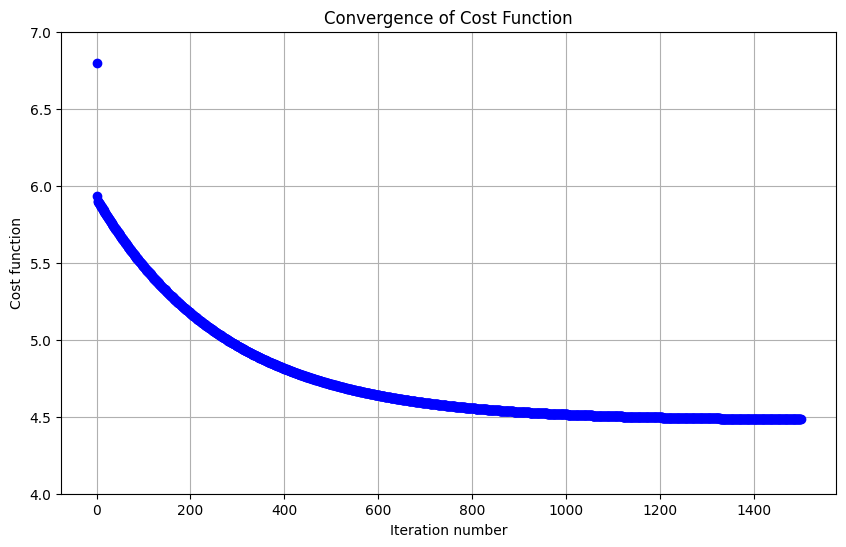

In [8]:
# 运行梯度下降算法以获取最优的theta参数值
initial_theta = np.zeros((X.shape[1],1)) # 初始化theta为全零向量
theta, thetahistory, jvec = descendGradient(X,initial_theta)

# 绘制Cost Function的收敛曲线
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])

plotConvergence(jvec)
dummy = plt.ylim([4,7])

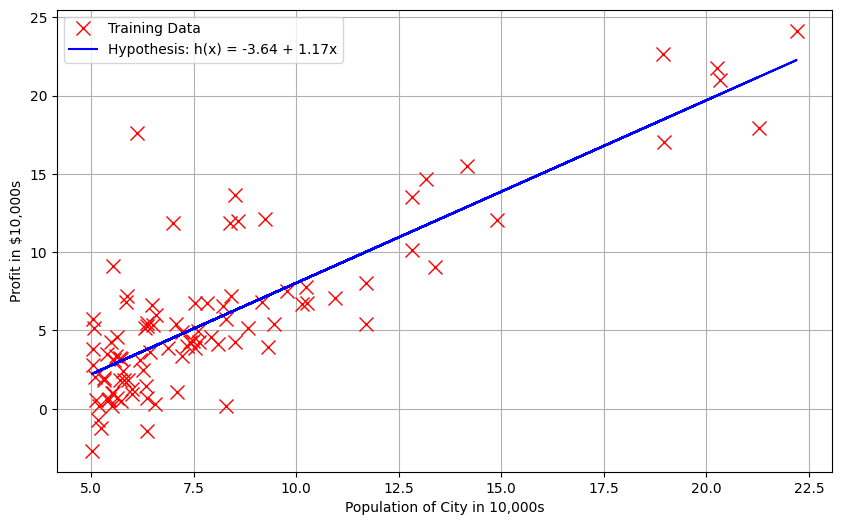

In [9]:
# 拟合函数可视化
def myfit(xval):
    return theta[0] + theta[1]*xval
    
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1], myfit(X[:,1]), 'b-', 
         label=f'Hypothesis: h(x) = {theta[0][0] :.2f} + {theta[1][0]:.2f}x')
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

#### Visualizing _J($\theta$)_ 损失函数可视化

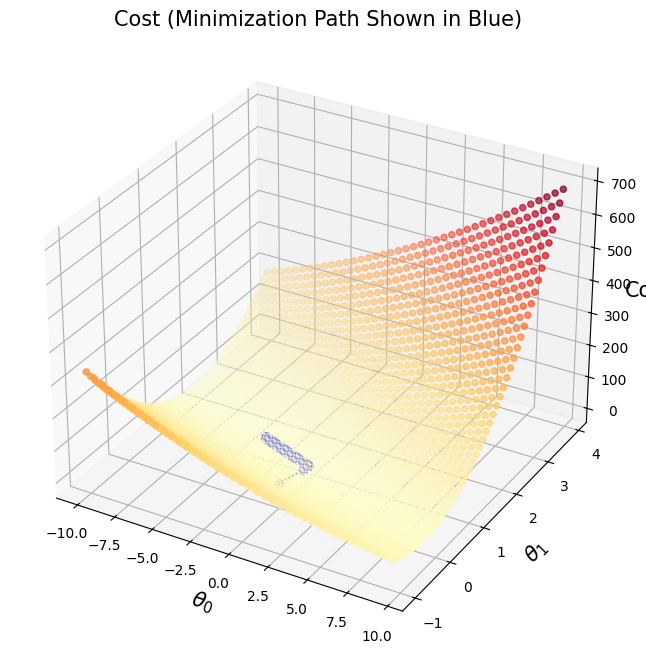

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xvals = np.arange(-10, 10, 0.5)
yvals = np.arange(-1, 4, 0.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]), X, y))

# 绘制3D散点图，使用绝对值作为颜色映射
scat = ax.scatter(myxs, myys, myzs, c=np.abs(myzs), cmap=plt.get_cmap('YlOrRd'))

ax.set_xlabel(r'$\theta_0$', fontsize=15)
ax.set_ylabel(r'$\theta_1$', fontsize=15)
ax.set_zlabel('Cost', fontsize=15)  # 增加z轴标签使图形更清晰
ax.set_title('Cost (Minimization Path Shown in Blue)', fontsize=15)

# 绘制优化路径
ax.plot([x[0] for x in thetahistory], [x[1] for x in thetahistory], jvec, 'bo-')

plt.show()

## 1.2 Linear Regression with multiple variables 多变量线性回归

In [20]:
datafile = 'ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size 
X = np.insert(X,0,1,axis=1)

print("X shape:", X.shape)
print(X[:5], "\n......")
print("y shape:", y.shape)
print(y[:5], "\n......")

X shape: (47, 3)
[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]] 
......
y shape: (47, 1)
[[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]] 
......


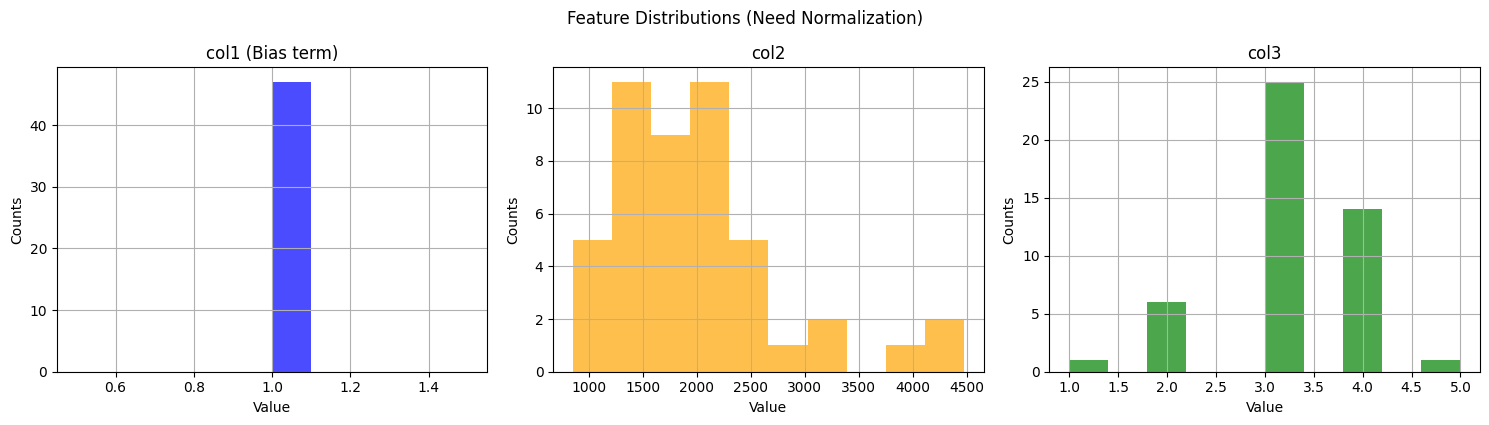

In [31]:
# 各列的取值分布情况
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 第一列（偏置项，全为1）
axes[0].hist(X[:,0], color='blue', alpha=0.7)
axes[0].set_title('col1 (Bias term)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Counts')
axes[0].grid(True)

# 第二列特征
axes[1].hist(X[:,1], color='orange', alpha=0.7)
axes[1].set_title('col2')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Counts')
axes[1].grid(True)

# 第三列特征
axes[2].hist(X[:,2], color='green', alpha=0.7)
axes[2].set_title('col3')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Counts')
axes[2].grid(True)

plt.tight_layout()  # 调整布局，避免重叠
plt.suptitle('Feature Distributions (Need Normalization)', y=1.05)
plt.show()

# 横轴：取值
# 纵轴：该值的出现次数
# 可以看到，各个特征的取值范围跨度很大，需要归一化f

In [34]:
# 对特征列进行Zscore归一化处理（减去均值，除以标准差）
# 存储均值和标准差供后续使用
# 注意：不要修改原始X矩阵，使用副本进行操作
stored_feature_means, stored_feature_stds = [], []  # 用于存储各特征列的均值和标准差
Xnorm = X.copy()  # 创建X的副本，避免修改原始数据

# 遍历每一列特征（icol为列索引）
for icol in range(Xnorm.shape[1]):
    # 计算当前列的均值并存储
    stored_feature_means.append(np.mean(Xnorm[:, icol]))
    # 计算当前列的标准差并存储
    stored_feature_stds.append(np.std(Xnorm[:, icol]))
    
    # 跳过第一列。第一列是偏置项，值全为1，无需归一化
    if not icol:
        continue
    
    # 对当前列进行归一化：(特征值 - 均值) / 标准差
    Xnorm[:, icol] = (Xnorm[:, icol] - stored_feature_means[-1]) / stored_feature_stds[-1]

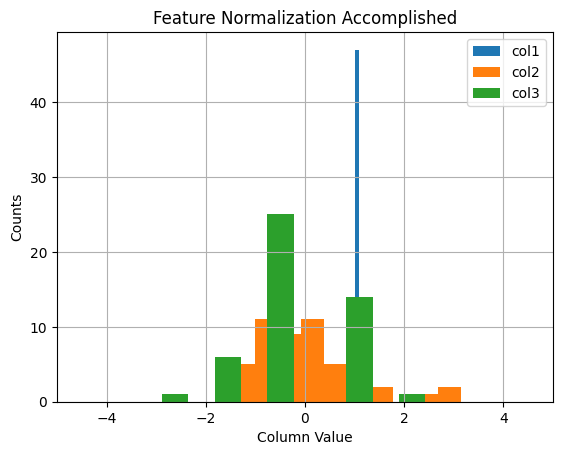

In [35]:
# 归一化后
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

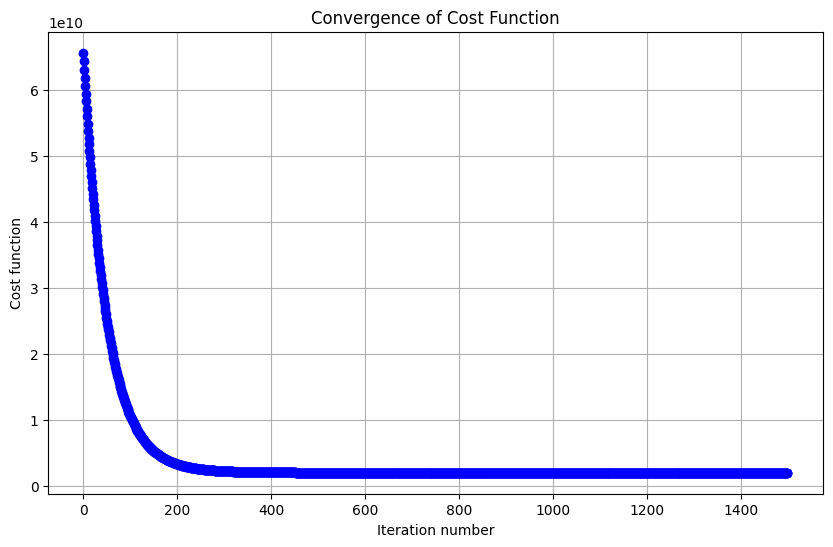

In [38]:
# 运行梯度下降，theta仍初始化为全0
# 注意！如果不行特征归一化，也就是下面代码直接使用X的话，会出现"overflow encountered in multiply"的错误
# 因为当不同特征的数值范围差异很大时，梯度下降可能会出现数值溢出
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

# CostFunction收敛曲线
plotConvergence(jvec)

In [48]:
# 打印最终优化得到的theta参数
print("Final result theta parameters: \n", theta)

# 检查模型效果：预测1650平方英尺、3卧室的房子价格
print("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650., 3.])
# 对测试数据进行特征归一化（与训练数据使用相同的均值和标准差）
# 注意：由于训练时跳过了第一列（偏置项），所以这里索引从x+1开始
ytestscaled = [(ytest[x] - stored_feature_means[x+1]) / stored_feature_stds[x+1] for x in range(len(ytest))]

# 在归一化后的测试特征前添加偏置项1
ytestscaled.insert(0, 1)

# 用函数计算预测值
print(f"${float(h(theta, np.array(ytestscaled).reshape(1, -1)).item()):.2f}")  # h返回nparray，需要item()转为标量

Final result theta parameters: 
 [[340412.56301439]
 [109371.67272252]
 [ -6502.3992545 ]]
Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$293098.15


In [46]:
from numpy.linalg import inv  # 从NumPy的线性代数模块导入矩阵求逆函数
# 实现正规方程，theta = (X^T · X)^(-1) · X^T · y
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [50]:
print ("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms:")
print (f"${float(h(normEqtn(X,y),[1,1650.,3]).item()):.2f}")

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms:
$293081.46
